#SDS 2019 - M1: Group Assignment

By Jonas Røge Jepsen, Michael Bering Olesen and Tobias Maltha Christensen

The link to colab can be found here: 
https://colab.research.google.com/drive/1AnEGZwOj2uAHjCaF5899QVeYg7zLptox

The link to Github: https://github.com/michael-bering/SDSM1Group


**Definition of a problem statement and a short outline of the implementation:**

We are working a with coffee bean review dataset, and want to see if it is possible to predict  the quality of the cupper (The person rating the coffee) based on the features in the dataset. 


**Description of data acquisition:**
We found “Coffee Beans Review” on Kaggle. The data on Kaggle comes from a Github, which have scraped the reviews from the Coffee Quality Institute. The reviews are made by Cuppers, and they are therefore subject some subjectivity. However, these reviewers (Cuppers) are educated through courses and exams on how to rate coffee. The data contains 1319 rows and 44 columns. Some of the columns contains nulls or faulty data, which needs to be cleaned or filled.

# Data preparation

In [1373]:
#First we import the required packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

#Importing our dataset as coffee
coffee = pd.read_csv('https://raw.githubusercontent.com/michael-bering/week-assignment/master/Coffee-modified.csv')

#Looking at the data to get an idea of the structure of the dataset
coffee.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.5,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.5,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0,0,0,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89,0.11,0,0,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.5,8.25,8.5,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [1374]:
# Looking a data types etc.
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 44 columns):
ID                       1312 non-null object
Species                  1319 non-null object
Owner                    1310 non-null object
Country.of.Origin        1316 non-null object
Farm.Name                961 non-null object
Lot.Number               276 non-null object
Mill                     1007 non-null object
ICO.Number               1169 non-null object
Company                  1105 non-null object
Altitude                 1092 non-null object
Region                   1257 non-null object
Producer                 1084 non-null object
Number.of.Bags           1314 non-null object
Bag.Weight               1314 non-null object
In.Country.Partner       1314 non-null object
Harvest.Year             1266 non-null object
Grading.Date             1313 non-null object
Owner.1                  1305 non-null object
Variety                  1110 non-null object
Processing.Method    

In [1375]:
#Showing all the null values in our dataset, which needs to be handled.
coffee.isnull().sum()

ID                          7
Species                     0
Owner                       9
Country.of.Origin           3
Farm.Name                 358
Lot.Number               1043
Mill                      312
ICO.Number                150
Company                   214
Altitude                  227
Region                     62
Producer                  235
Number.of.Bags              5
Bag.Weight                  5
In.Country.Partner          5
Harvest.Year               53
Grading.Date                6
Owner.1                    14
Variety                   209
Processing.Method         160
Aroma                       8
Flavor                     10
Aftertaste                 10
Acidity                    10
Body                       10
Balance                    10
Uniformity                 10
Clean.Cup                  12
Sweetness                  11
Cupper.Points              11
Total.Cup.Points           11
Moisture                   11
Category.One.Defects       11
Quakers   

The features we would like to work with in this assignment is the features from "Variety" to "Category.Two.Defects" expect for "Total.Cup.Points" which we drop afterwards, because this is just a sum of the other points/ratings. Most columns such as Lot.Number, Farm.Name different certifications etc. are deselected because of to many missing values, to many unique values or just being irrelevant.

In [1376]:
# Choosing the features
coffee_sorted = coffee.loc[:,'Variety':'Category.Two.Defects']
# Because it's easier/more effective to write a from to "statement", we included 
# Total.Cup.Points, but this is not relevant so we drop it from the dataframe
coffee_sorted.drop(columns=['Total.Cup.Points'], inplace=True)

# Showing our new "coffee_sorted"
coffee_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 17 columns):
Variety                 1110 non-null object
Processing.Method       1159 non-null object
Aroma                   1311 non-null object
Flavor                  1309 non-null object
Aftertaste              1309 non-null object
Acidity                 1309 non-null object
Body                    1309 non-null float64
Balance                 1309 non-null float64
Uniformity              1309 non-null float64
Clean.Cup               1307 non-null float64
Sweetness               1308 non-null float64
Cupper.Points           1308 non-null object
Moisture                1308 non-null object
Category.One.Defects    1308 non-null object
Quakers                 1307 non-null object
Color                   1092 non-null object
Category.Two.Defects    1307 non-null float64
dtypes: float64(6), object(11)
memory usage: 175.3+ KB


We want to convert the different columns to their correct datatype, so we are able to visualize and use the data.

In [1377]:
# We start by looking at Aroma since that's the value with most rows. 
coffee_sorted.Aroma.value_counts()
# We could have used Unique, but value_counts() includes null values.

7.67                            173
7.5                             162
7.58                            149
7.75                            122
7.42                            120
7.83                            101
7.33                             96
7.25                             77
7.92                             57
7.17                             45
8                                43
7.08                             28
7                                23
8.17                             20
8.08                             20
6.92                             14
8.25                              9
6.83                              9
8.42                              9
8.33                              6
6.75                              5
8.5                               3
6.67                              3
7.81                              2
8.67                              2
6.5                               2
10                                1
November 15th, 2018         

Since Aroma is a numerical value we want to convert it to a float, but first we need to remove/drop the rows with misplaced values such as string that prevent us from converting. There is three rows with string values such as "Blossom Valley International", we drop these rows.

In [0]:
coffee_sorted.drop(coffee_sorted[coffee_sorted.Aroma == 'Blossom Valley International'].index, inplace = True)
coffee_sorted.drop(coffee_sorted[coffee_sorted.Aroma == 'November 15th, 2018'].index, inplace = True)
coffee_sorted.drop(coffee_sorted[coffee_sorted.Aroma == 'Specialty Coffee Association'].index, inplace = True)

In [1379]:
# Converting Aroma to float
coffee_sorted['Aroma'] = coffee_sorted.Aroma.astype(float)
#Showing that Aroma is now a float
coffee_sorted.Aroma.dtype

dtype('float64')

In [1380]:
#We also had a 0 value in Aroma, which seems like an outlier. Let's have a look
coffee_sorted[coffee_sorted['Aroma'] == 0.00]

,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects
1318,Caturra,NaN,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.12,0,0,Green,2.0


In [0]:
# Because most of the values in this row is null, we drop it. Had all values
# been null or nan we could have found and dropped this row by specifying dropna 
# and setting it to how='all'.
coffee_sorted.drop(coffee_sorted[coffee_sorted['Aroma'] == 0.00].index, inplace = True)

In [0]:
# We want to convert the other numerical values to a float aswell instead of 
# them being an object
coffee_sorted['Flavor'] = coffee_sorted.Flavor.astype(float)
coffee_sorted['Aftertaste'] = coffee_sorted.Aftertaste.astype(float)
coffee_sorted['Acidity'] = coffee_sorted.Acidity.astype(float)

In [1383]:
# Trying to convert Cupper.Points resulted in a error so we check it
coffee_sorted['Cupper.Points'].value_counts()

7.5                  151
7.58                 135
7.33                 114
7.67                 113
7.42                 103
7.25                  85
7.75                  84
7.83                  81
7.17                  63
7.92                  52
8                     51
7                     49
7.08                  38
8.08                  23
6.83                  21
8.17                  20
6.67                  20
6.92                  18
6.75                  14
8.5                    8
8.33                   8
6.5                    6
8.25                   6
6.58                   6
8.42                   6
8.58                   5
6.42                   4
10                     4
6.17                   3
6.33                   3
8.67                   2
6                      1
9.25                   1
5.25                   1
9                      1
5.17                   1
8.83                   1
8.75                   1
January 4th, 2013      1
6.25                   1


In [1384]:
# We can see that we have a date, which cause the problem. Lets remove it.
coffee_sorted.drop(coffee_sorted[coffee_sorted['Cupper.Points'] == 'January 4th, 2013'].index, inplace = True)
coffee_sorted['Cupper.Points'] = coffee_sorted['Cupper.Points'].astype(float)

# Now it is sucessfully changed to a float
coffee_sorted['Cupper.Points'].dtype

dtype('float64')

In [0]:
# Converting the rest of the numerical values corretly into floats.
coffee_sorted['Moisture'] = coffee_sorted.Moisture.astype(float)
coffee_sorted['Category.One.Defects'] = coffee_sorted['Category.One.Defects'].astype(float)
coffee_sorted['Quakers'] = coffee_sorted.Quakers.astype(float)


In [1386]:
# Showing that the numerical values in "coffee_sorted" is now correctly assigned 
# to float values
coffee_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 1317
Data columns (total 17 columns):
Variety                 1105 non-null object
Processing.Method       1155 non-null object
Aroma                   1306 non-null float64
Flavor                  1306 non-null float64
Aftertaste              1306 non-null float64
Acidity                 1306 non-null float64
Body                    1306 non-null float64
Balance                 1306 non-null float64
Uniformity              1306 non-null float64
Clean.Cup               1306 non-null float64
Sweetness               1306 non-null float64
Cupper.Points           1306 non-null float64
Moisture                1306 non-null float64
Category.One.Defects    1306 non-null float64
Quakers                 1305 non-null float64
Color                   1091 non-null object
Category.Two.Defects    1306 non-null float64
dtypes: float64(14), object(3)
memory usage: 184.8+ KB


In [1387]:
# We can see in our .info above that Variety got alot of missing values compared
# to the floats.
print('Number of null values: ',coffee_sorted.Variety.isnull().sum())
print(coffee_sorted.Variety.value_counts())

Number of null values:  209
Caturra                  255
Bourbon                  225
Typica                   209
Other                    108
Catuai                    73
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   8
Arusha                     5
Peaberry                   5
Mandheling                 3
Sumatra                    3
Ethiopian Yirgacheffe      2
Java                       2
Blue Mountain              2
Ruiru 11                   2
Ethiopian Heirlooms        1
Marigojipe                 1
Sumatra Lintong            1
Sulawesi                   1
Moka Peaberry              1
Pache Comun                1
Name: Variety, dtype: int64


In [1388]:
# We have 209 null values, which is too many to drop for our size of dataset
# Therefore we set our null values to the most frequent,
# so we dont lose data in the other columns. 
coffee_sorted['Variety'].fillna('Caturra', inplace = True) 
# This could also be done by using the Simpleimputer from sklearn with the 
# "most frequient" argument. 
coffee_sorted.Variety.value_counts().head()

Caturra    464
Bourbon    225
Typica     209
Other      108
Catuai      73
Name: Variety, dtype: int64

We could drop 'other' from variety, but we want to keep as much data as possible, and thereby keeping some of the possible latent patterns.

Further, it might be problematic that we change our nulls to the most frequent value, as this might screw with our data and the patterns that the algorithm possibly could have found. This is something we are aware of, but dropping the nulls results in us losing to much of our already limited data.

In [1389]:
# Same as before when we changed Variety to the most frequent. We do the same for our color.
print('Data before setting nulls to most frequent:\n',coffee_sorted.Color.value_counts(),'\n')
coffee_sorted['Color'].fillna('Green', inplace = True) #Again could've used Simpleimputer
print('Data after setting nulls to most frequent:\n',coffee_sorted['Color'].value_counts())
# Again this might be problematic, because it changes the distribution of the data, and "none" could perhaps also have been changed.

Data before setting nulls to most frequent:
 Green           847
Bluish-Green    112
Blue-Green       81
None             51
Name: Color, dtype: int64 

Data after setting nulls to most frequent:
 Green           1070
Bluish-Green     112
Blue-Green        81
None              51
Name: Color, dtype: int64


In [1390]:
# Setting nulls to most frequent for Processing Method
print('Data before setting nulls most frequent:\n',coffee_sorted['Processing.Method'].value_counts(),'\n')
coffee_sorted['Processing.Method'].fillna('Washed / Wet', inplace = True) #Again could've used Simpleimputer
print('Data after setting nulls most frequent:\n',coffee_sorted['Processing.Method'].value_counts())
# Again this might be problematic, because it changes the distribution of the data, and "other" could perhaps also have been changed.

Data before setting nulls most frequent:
 Washed / Wet                 809
Natural / Dry                250
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64 

Data after setting nulls most frequent:
 Washed / Wet                 968
Natural / Dry                250
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64


In [1391]:
# we know from earlier that there some missing values in Quakers, so we check if
# this is still the case
coffee_sorted.Quakers.isnull().sum()

9

In [1392]:
#Setting nulls to most frequent for Quakers
print('Data before setting nulls most frequent(0):\n',coffee_sorted['Quakers'].value_counts(),'\n')
coffee_sorted['Quakers'].fillna(0, inplace = True)
print('Data after setting nulls most frequent(0):\n',coffee_sorted['Quakers'].value_counts())

Data before setting nulls most frequent(0):
 0.0     1211
1.0       39
2.0       30
3.0        5
5.0        5
4.0        5
6.0        4
7.0        3
8.0        1
9.0        1
11.0       1
Name: Quakers, dtype: int64 

Data after setting nulls most frequent(0):
 0.0     1220
1.0       39
2.0       30
3.0        5
5.0        5
4.0        5
6.0        4
7.0        3
8.0        1
9.0        1
11.0       1
Name: Quakers, dtype: int64


In [1393]:
# To get an overview of our work, we print info again.
coffee_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 1317
Data columns (total 17 columns):
Variety                 1314 non-null object
Processing.Method       1314 non-null object
Aroma                   1306 non-null float64
Flavor                  1306 non-null float64
Aftertaste              1306 non-null float64
Acidity                 1306 non-null float64
Body                    1306 non-null float64
Balance                 1306 non-null float64
Uniformity              1306 non-null float64
Clean.Cup               1306 non-null float64
Sweetness               1306 non-null float64
Cupper.Points           1306 non-null float64
Moisture                1306 non-null float64
Category.One.Defects    1306 non-null float64
Quakers                 1314 non-null float64
Color                   1314 non-null object
Category.Two.Defects    1306 non-null float64
dtypes: float64(14), object(3)
memory usage: 184.8+ KB


In [1394]:
# We can see that all the null values for Aroma is null throughout all the 
# columns expect for those we set to most frequent. Therefore, we drop them,
# an alternative solution could have been dropna(how = all) earlier in the
# notebook.
coffee_sorted[coffee_sorted.Aroma.isnull()]

,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects
919,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN
962,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN
964,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN
1086,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN
1087,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN
1088,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN
1090,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN
1291,Caturra,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Green,NaN


In [0]:
#Dropping the null rows
coffee_sorted.drop(coffee_sorted[coffee_sorted['Aroma'].isnull()].index, inplace = True)

In [1396]:
#We can now see that we have equal amount of rows in all the columns.
coffee_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1317
Data columns (total 17 columns):
Variety                 1306 non-null object
Processing.Method       1306 non-null object
Aroma                   1306 non-null float64
Flavor                  1306 non-null float64
Aftertaste              1306 non-null float64
Acidity                 1306 non-null float64
Body                    1306 non-null float64
Balance                 1306 non-null float64
Uniformity              1306 non-null float64
Clean.Cup               1306 non-null float64
Sweetness               1306 non-null float64
Cupper.Points           1306 non-null float64
Moisture                1306 non-null float64
Category.One.Defects    1306 non-null float64
Quakers                 1306 non-null float64
Color                   1306 non-null object
Category.Two.Defects    1306 non-null float64
dtypes: float64(14), object(3)
memory usage: 183.7+ KB


# EDA 

In [1397]:
# To get a general idea about the data we use .describe
coffee_sorted.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000
mean,7.570620,7.524778,7.404188,7.539556,7.523982,7.523959,9.842458,9.840651,9.911585,7.504747,0.088775,0.428025,0.177642,3.596478
std,0.315356,0.341473,0.348587,0.320085,0.293040,0.348676,0.486901,0.723086,0.455106,0.426504,0.048026,1.835732,0.841813,5.354723
min,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,6.000000,0.000000,1.330000,5.170000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,31.000000,11.000000,55.000000


Looking at the above table, it is for instance possible to tell that Cupper.Points varies from a minimum value of 5.17 to a maximum value of 10, with a mean of 7.5.

In [0]:
from sklearn.preprocessing import LabelEncoder # importing LabelEncoder
encoder = LabelEncoder()

# Encodes all obejcts so we can visualize it, 
# it translates the categories into numerical values
coffee_sorted['Processing.Method'] = encoder.fit_transform(coffee_sorted['Processing.Method'])
coffee_sorted['Color'] = encoder.fit_transform(coffee_sorted['Color'])
coffee_sorted['Variety'] = encoder.fit_transform(coffee_sorted['Variety'])

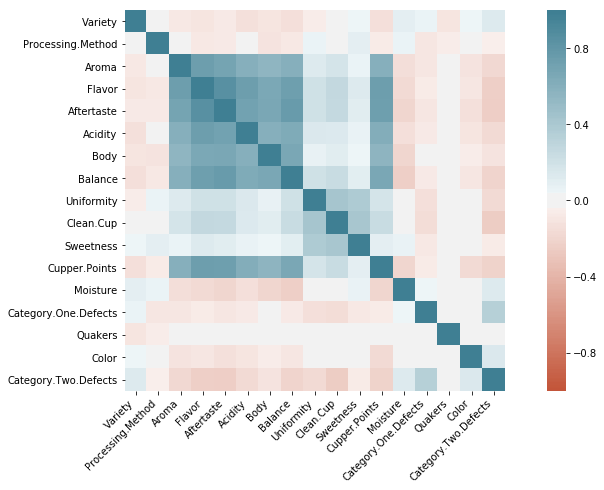

In [1399]:
# Creating a heatmap for the correlation between our features
plt.figure(figsize=(15,7))
corr = coffee_sorted.corr() # storing the correlation as corr

# Plotting the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As it can be seen on the heat map it makes sense to try to predict Cupper.Point, because there a somewhat high correlation between this and other variables such as Aroma and Flavor.

When we choise a numerical value such as Cupper.Point as our target valueable, is it important to notice that we get an regression problem, rather than a classification problem.

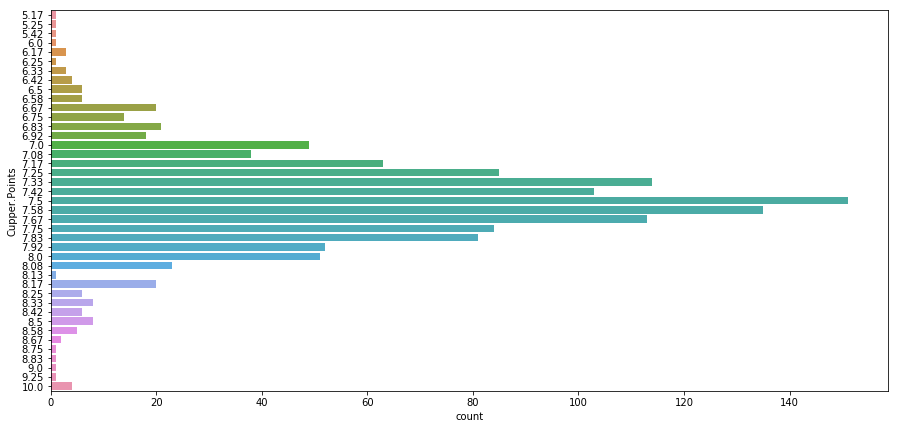

In [1400]:
plt.figure(figsize=(15,7))
sns.countplot(y='Cupper.Points', data = coffee_sorted) #A countplot for Cupper.Points

Based on our countplot is it possible to se the distribution of the values in Cupper.Points and that a lot of the data lies between 7 and 8.

# Preprocessing

In this section we scale and split our data. To prepare for the upcoming machine learning.

In [0]:
# Set 'Cupper.Points' to the target-variable 'y'
y = coffee_sorted['Cupper.Points']
# Set the features to 'X', hence dropping the 'Cupper.Points column
X = coffee_sorted.drop(columns='Cupper.Points')

In [0]:
# Import Standardscaler from Sklearn, which scales the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling X features 
X_scaled = scaler.fit_transform(X)

In [0]:
# Import the package for train, test and split and setting it for X and y
# Setting testsize to 25% and the randomstate to '42' so it can be replicated
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

# Unsupervised learning

The point of unsupervised machine learning is to do data exploration and recognize patterns, that we have not found yet or cannot see. Unsupervised machine learning includes dimensionality reduction and clustering. Dimensionality reduction of the data = What is the lowest amount of components we can go without losing to much data, and minimize noise as well as slow computation. Clustering is where the unsupervised machine learning tries to find homogenous subgroups within the larger groups.

The first step is to do a Principal components analysis (PCA) which works with quantitative data. PCA is a kind of dimensionality reduction.


In [0]:
# Importing PCA
from sklearn.decomposition import PCA
#Setting an instant for the model
pca = PCA() #To begin with do we not set n_components

In [0]:
#Use the fit_transform method to generate the PCA using the scaled data from Preprocessing
coffee_pca = pca.fit_transform(X_scaled) 

In [0]:
#Storing the range
p_features = range(pca.n_components_)

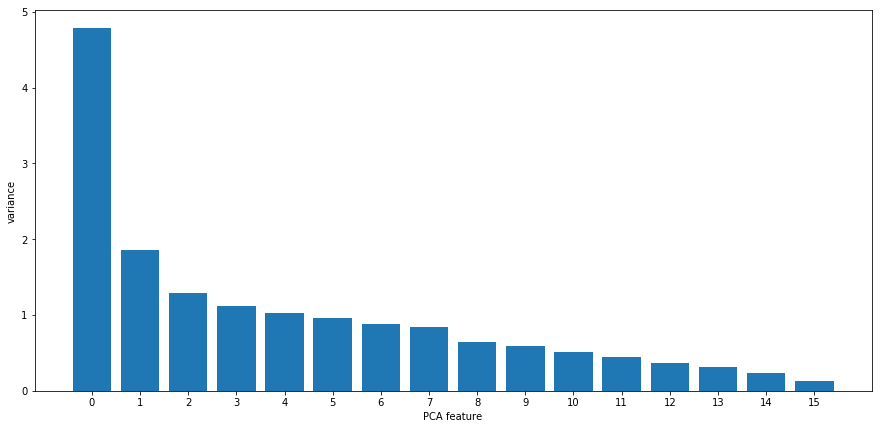

In [1407]:
#We use a bar plot to show the varience by component
plt.figure(figsize = (15,7))
#Put p_feauters and the pca explained variance into the graph as x and y
plt.bar(p_features, pca.explained_variance_)
plt.xticks(p_features)
#Always label your x- and y-axis
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

With help from the plot we can see it have a small snap at PCA componet 0, 1, 2 and at 7 in variance of data. (Remember it starts at zero). We choose to have the total of 3 components.

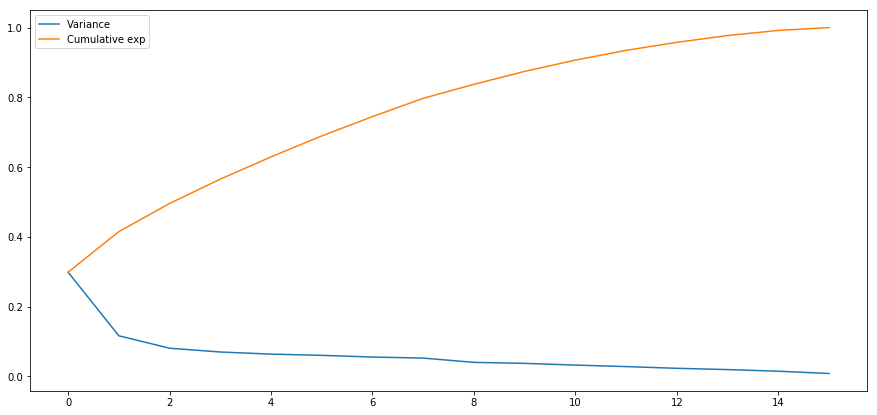

In [1408]:
#setting the plot size
plt.figure(figsize = (15,7))
#This Plot will show componets wise how much explained variance(Blue) and cumulative explained variance(Orange)
plot_data = pd.DataFrame({'Variance': pca.explained_variance_ratio_,'Cumulative exp': np.cumsum(pca.explained_variance_ratio_)}).stack()
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue = plot_data.index.get_level_values(1))

The graph shows that we with 3 componets we are able to explain around 50% off the data set, but to get the precise number we calculate it below.

In [1409]:
pca = PCA(n_components=3)
coffee_pca = pca.fit_transform(X_scaled) 
#What cumsum is calculating is the percentage of variance explained by each componetes/features
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
#Caluclating the cumsum and getting the result in %
print('The cummulative explained variance ratio:', pca.explained_variance_ratio_.sum())
print('So this will explain', pca.explained_variance_ratio_.sum()*100,'% of the data') 

[0.29866458 0.41498126 0.49568771]
The cummulative explained variance ratio: 0.4956877093742187
So this will explain 49.56877093742187 % of the data


Each result in the cumulative explained variance ratio, is what the componets gives as variance/data. The first feature/componet gives aorund 0.29% variance, while the second gives 0.41 - 0.29 = 0.12 in variance and so on.

**KMeans**

In [0]:
#Importing the packages and instantiate KMeans()
from sklearn.cluster import KMeans 
kmeans = KMeans()

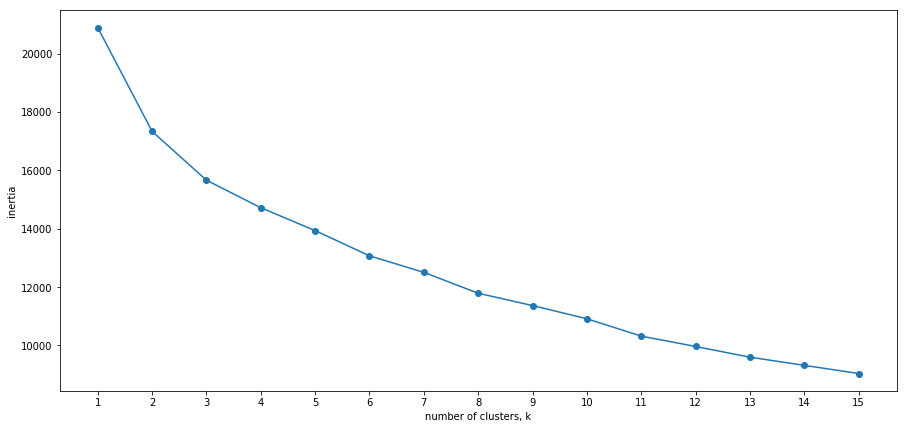

In [1411]:
#Finding the inertia which is when K-means tries to separate the data into n groups, while the groups still have the same variance.
#Using a for-loop to run through all 16 features
#This is also called the "Elbow Method"
inertia = []
for i in range(1,16):
  k_means = KMeans(n_clusters=i)
  inertia.append(k_means.fit(X_scaled).inertia_) #Using the X_scaled data 
#Plotting the graph with inertia/clusters and with the number of features
plt.figure(figsize=(15,7))
plt.plot(range(1,16), inertia, '-o')
#always label your x- and y-axis
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,16))
plt.show()

When looking at the plot, we have to find the lowest amount of inertia with the least amount of clusters. Applying the elbow method is to find the spot where it starts to flat out. Our analysis results in choosing 3 clusters, because after cluster 3 the line is smoothing out.

In [0]:
#Setting our K-means to 3 clusters and fit the function with the data from the PCA. 
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(coffee_pca);

In [1413]:
#We are creating a new column called "Cluster" with the data from the predict.
coffee_sorted['clusters'] = kmeans.predict(coffee_pca)
#Showing the mean values of cluster to get an overview how the featues have been split
coffee_sorted.groupby('clusters').mean()

,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects
clusters,,,,,,,,,,,,,,,,,
0,12.041946,3.307047,7.403289,7.330671,7.205168,7.355805,7.343523,7.334329,9.910336,9.966309,9.979799,7.310839,0.102265,0.313758,0.182886,1.902685,3.622483
1,9.146832,2.982998,7.761360,7.756012,7.640665,7.743323,7.714158,7.749134,9.897512,9.936043,9.939057,7.742689,0.075533,0.273570,0.174652,1.748068,2.737249
2,12.412698,2.555556,7.194762,6.986349,6.858413,7.185238,7.278095,7.005397,8.634921,7.672222,8.984127,6.895556,0.097143,3.095238,0.158730,1.968254,12.174603


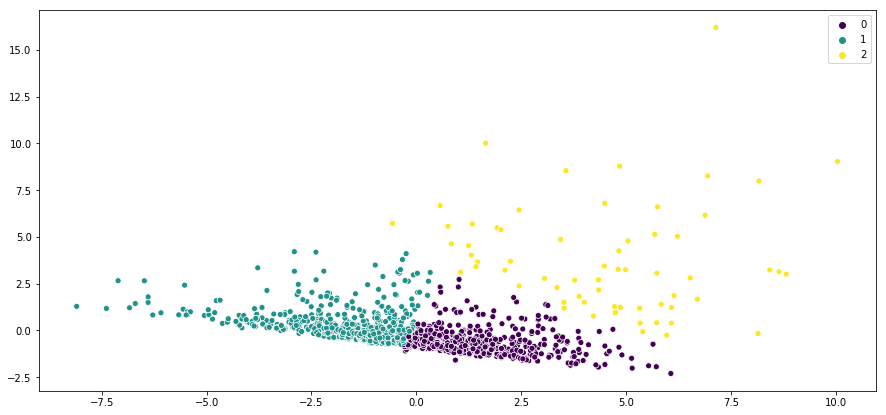

In [1414]:
#Creating a plot to show the 3 clusters.
plt.figure(figsize = (15,7))
#Plotting the scatterplot

g = sns.scatterplot(coffee_pca[:,0], coffee_pca[:,1], hue = kmeans.labels_,
               legend = 'full', palette = 'viridis')
legend = g.get_legend()

The plot shows the 3 clusters. However it could be nice to see the features in relation to the clusters, to see if there is any patterns in relation to these.

In [0]:
#Creating an interactive plot, where you as a user can look into the different data and clusters with help of your mouse.
#Load the needed bokeh modules for the interactive plot
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Set1_6
from bokeh.transform import factor_cmap

In [0]:
#Setting the values for the interactive plot.
d = {'y':coffee_pca[:,1],'x':coffee_pca[:,0], 'Aroma': coffee_sorted.Aroma, 
     'cluster': coffee_sorted['clusters'].map({0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',12:'m',13:'n',14:'o'}),
     'Flavor':coffee_sorted['Flavor'],
     'Acidity':coffee_sorted['Acidity'],
     'Body':coffee_sorted['Body'],
     'Variety':coffee_sorted['Variety'],
     'Balance':coffee_sorted['Balance'],
     'Uniformity':coffee_sorted['Uniformity'],
     'Sweetness':coffee_sorted['Sweetness'],
     'Moisture':coffee_sorted['Moisture'],
     'Quakers':coffee_sorted['Quakers'],
     'Color':coffee_sorted['Color'],
     'ProcessingMethod':coffee_sorted['Processing.Method'],
     'CupperPoints':coffee_sorted['Cupper.Points'],
     'CategoryOneDefects':coffee_sorted['Category.One.Defects'],
     'CategoryTwoDefects':coffee_sorted['Category.Two.Defects']}

In [0]:
# Define the color-palette
colors = factor_cmap('cluster', palette = Set1_6, factors = d['cluster'].unique())

In [0]:
# Transform the data to Bokeh format
d = ColumnDataSource(d)

In [1419]:
# Define interactive tooling and plot for notebook output
output_notebook()

#Setting the different tools and data for the interactive plot
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"
p = figure(tools=TOOLS)
p.hover.tooltips = [('Aroma', "@Aroma"),('Flavor', "@Flavor"),('Acidity', "@Acidity"),('Body',"@Body"),('Variety',"@Variety"),('Balance',"@Balance"),('Uniformity',"@Uniformity"),
                    ('Sweetness',"@Sweetness"),('Moisture',"@Moisture"),('Quakers',"@Quakers"),('Color',"@Color"),('ProcessingMethod',"@ProcessingMethod"),
                    ('CupperPoints',"@CupperPoints"),('CategoryOneDefects',"@CategoryOneDefects"),('CategoryTwoDefects',"@CategoryTwoDefects")]
plt.figure(figsize=(20,12)) 
p.scatter(x='x', y='y',fill_alpha=0.8,
          color = colors,
          line_color = None,
          radius = 0.1,
          source=d)
show(p)

<Figure size 1440x864 with 0 Axes>

Using the interactive plot and reading the data does not give a clear picture of what data/features the K-Means bases its cluster on. But it might give some insights

In [0]:
#Creating a crosstab of a choosen feature and the clusters to see how the feature are split into the different clusters
#We are using a heatmap to visualize it
coffee_cross = pd.crosstab(index=coffee_sorted['Aroma'], columns=coffee_sorted['clusters'], normalize='columns')

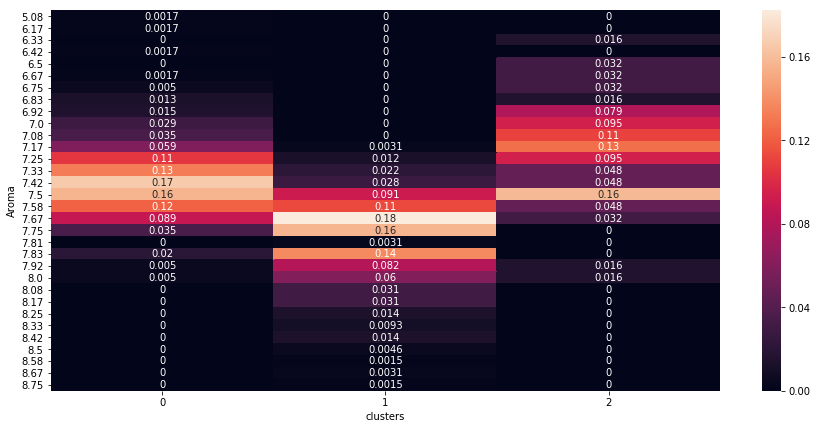

In [1421]:
#Creating the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(coffee_cross, annot=True)

As shown in the heatmap, we can see a pattern in relation to the feature 'Aroma' and how its values are split over the 3 clusters. Cluster 1 have the highest values whereas cluster 2 seems to have the lower Aroma values. We have tested the other features, and some of these have shown the same pattern, while others do not seem to have a pattern at all. (Note the clusters may shift with every re-run of the code)

# Supervised learning

We want to predict Cupper.Points, which means we are working with a regression problem. This is a regression problem, because we want to predict a continuous target variable and not a category or class such as the variety in our data set. 

In [0]:
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# import cross val predict used for scatterplot of actual vs. predicted
from sklearn.model_selection import cross_val_predict

In the code block below we create a new function called models_cross_valadation, it takes one input and that is an instantiation of a model such as LinearRegression. We create this function to avoid having to write the same code for each model over and over, and to make it easier to make changes to what we use as scoring for each model etc. Basically, the function does the following, it creates a list called result, then it runs a for-loop, which iterates three times one for every score we have set. Within the for-loop a cross validation is run with 10 folds on the chosen model and with one of the scores. Then it prints the name of the scoring method, the score for each iteration of the cross validation, and then the mean score of all the iterations. The mean of the score is then saved in the results list for later usage in relation to comparing the different models. The function finally returns the list results.

Note: We are aware that calculating three measures like this with 10-fold cross validation might take a lot of "calculation time" on a bigger dataset than ours, in which case it might not be an optimal solution.

In [0]:
def models_cross_valadation(modelofchoice):
  results=[]
  for i in ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']: 
    scores = cross_val_score(modelofchoice, X_train, y_train, cv = 10, scoring=i)
    if i == 'neg_mean_squared_error': # we want RMSE not MSE, therefore this is treated different than the other results
      print('RMSE:', np.sqrt(abs(scores)), '\n') # abs inverts to positive result, sqrt because we want RMSE and not MSE
      print('RMSE mean:',  np.mean(np.sqrt(abs(scores))), '\n') # \n = new line
      results.append(np.mean(np.sqrt(abs(scores)))) # saving result for later
    else :
      print(i, scores, '\n')
      print(i, 'mean:',  np.mean(scores), '\n')
      results.append(np.mean(scores)) # saving result for later
  return results

In the code block below we create a new function called models_actual_vs_predicted, it takes the same parameter as the above function. It creates a scatterplot and a regression line of the algorithm used (modelofchoice), and the predicted vs. actual values of Cupper.Points. 

In [0]:
def models_actual_vs_predicted(modelofchoice):
 predicted = cross_val_predict(modelofchoice, X_train, y_train, cv=10) #crossvalidating with train set
 fig, ax = plt.subplots()
 ax.scatter(y_train, predicted,) #creates scatterplot
 ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4) #creates regression line
 ax.set_xlabel('Actual') #always label ypur x- and y-axis
 ax.set_ylabel('Predicted')
 plt.show()

**LinearRegression**

Linear Regression is a somewhat basic model, that fits a line to the data, it then uses OLS (ordinary least squares) to find the optimal line in relation to minimizing OLS (the error function).

In [1425]:
# Import and instantiate the model
from sklearn import linear_model
reg = linear_model.LinearRegression()

# using our own function (with crossvalidation and 3 different scoring types)
# and since it returns the result list with the mean in relation to each score
# we save that as reg_results
reg_results = models_cross_valadation(reg) 

# Model training
reg.fit(X_train, y_train)

# Model performance on the test-set
print('Score:', reg.score(X_test, y_test))
y_pred = reg.predict(X_test)

neg_mean_absolute_error [-0.16279025 -0.13437801 -0.13623749 -0.14144247 -0.17545313 -0.1567861
 -0.12357124 -0.13782083 -0.15987289 -0.16000734] 

neg_mean_absolute_error mean: -0.1488359749016624 

RMSE: [0.33612164 0.18755725 0.20521189 0.19349438 0.35783699 0.3119337
 0.17915473 0.18758661 0.31714448 0.32712209] 

RMSE mean: 0.2603163751545188 

r2 [0.4153955  0.8243908  0.64361698 0.81107463 0.35392944 0.56665939
 0.74632401 0.82665042 0.39848071 0.5110534 ] 

r2 mean: 0.609757528647943 

Score: 0.5638499198873439


The mean of MAE (mean absolute error) for each cross validation of our LinearRegression model is 0.1488, this means that we can expect our prediction off 'Cupper.Points' to be off by 0.1488 in average. MAE is in the same measure as our "y", and we want it to be as close to 0 as possible. So, at first glance a value of 0.1488 seems pretty good, but it should be seen in the light off how much the y value differs. In our case Cupper.Points ranges from 5.170000 to 10, which makes the result less impressive, but it is still pretty good.	

The mean of RMSE (root mean squared error) for each cross validation of our LinearRegression model is 0.2603. RMSE is calculated by squaring the difference between the predictions and actual truth. It is therefore bigger than MAE and more sensitive to outliers, but we still want it to be as close to zero as possible. 

R2 quantifies the amount of variance in Cupper.Points that is predicted from the features. Simplyfied the more the value of R2 is close to 1 the better the model.

(Main source: https://becominghuman.ai/understand-regression-performance-metrics-bdb0e7fcc1b3)

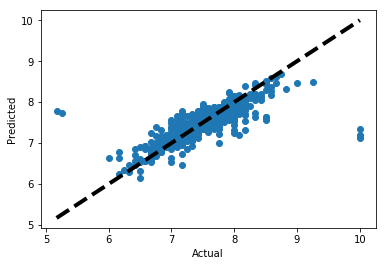

In [1426]:
# plotting the actual vs. predicted values of Cupper.Points based the on algorithm
models_actual_vs_predicted(reg)

The closer the dots are to the regression line the better. As it can be seen on the plot the algorithm has a hard time predicting the value of Cupper.Points when it is near the minimum and maximum value of 5 and 10.

**Lasso**

Lasso regression is similar to linear regression, but with some twists. Lasso can "weigh" features differently, and thereby remove features that are not useful in predicting the value.

In [1427]:
# Import and instantiate the model
from sklearn.linear_model import Lasso
lasso = Lasso()

# using our own function (with crossvalidation and 3 different scoring types)
# and since it returns the result list with the mean in relation to each score
# we save that as reg_results
lasso_results = models_cross_valadation(lasso) 

# Model training
lasso.fit(X_train, y_train)

# Model performance on the test-set
print('Score:', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)

neg_mean_absolute_error [-0.29668975 -0.33148729 -0.26578019 -0.31944706 -0.30744423 -0.32042415
 -0.25890465 -0.33667215 -0.28568128 -0.32294504] 

neg_mean_absolute_error mean: -0.3045475791792703 

RMSE: [0.44060323 0.44972591 0.34670153 0.44530324 0.44894544 0.47388736
 0.35679635 0.46490192 0.41085723 0.46832847] 

RMSE mean: 0.43060506683817845 

r2 [-0.00453382 -0.00966054 -0.0172401  -0.00061104 -0.01694302 -0.00012674
 -0.00615201 -0.06473562 -0.00952508 -0.00217325] 

r2 mean: -0.013170122808863937 

Score: -4.117033726291908e-05


The scoring results for the lasso model, are quite bad, and the results in regards to each measure/score is worse than those for LinearRegression.

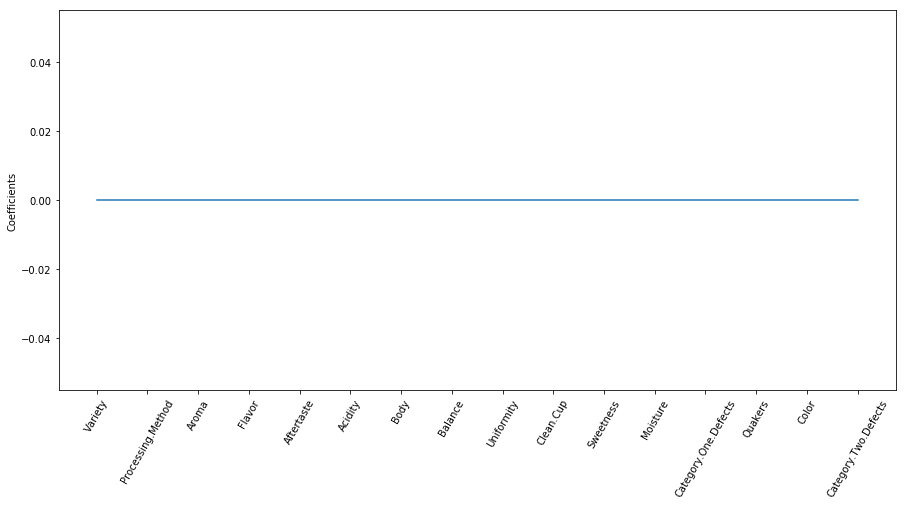

In [1428]:
# So what does the lasso model consider the most inportant features or reframed
# how does it "weigh" the different features. To visualize this we plot the
# coefficients
lasso_coef = lasso.coef_
plt.figure(figsize=(15,7)) # making the size of the figure bigger
_ = plt.plot(range(len(lasso_coef)), lasso_coef)
_ = plt.xticks(range(len(lasso_coef)), X, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

As it can be seen on the above figure the lasso model treats each feature equally, when we do not make any changes to its hyperparameters (more on this later in the report in the section hyperparameter tuning)

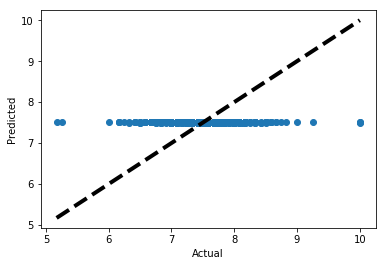

In [1429]:
# plotting the actual vs. predicted values of Cupper.Points based on the algorithm
models_actual_vs_predicted(lasso)

As can be seen the algorithm basically just predicts the mean value, when alpha is set to the default. Which results in some very inaccurate predictions.

**xgboost**

"XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data" (https://www.datacamp.com/community/tutorials/xgboost-in-python) 

For this reason and because we want an algortim that varies more from the two above, we choose to apply this model as well.

In [1430]:
# Import and instantiate the model
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

# using our own function (with crossvalidation and 3 different scoring types)
# and since it returns the result list with the mean in relation to each score
# we save that as reg_results
xgb_results = models_cross_valadation(xg_reg)

# Model training
xg_reg.fit(X_train, y_train)

# Model performance on the test-set
print('Score:', xg_reg.score(X_test, y_test))
y_pred = xg_reg.predict(X_test)

[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

So, as it can be seen on the above results xgboost seems to perform better on all scores compared to the two other models.

[20:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

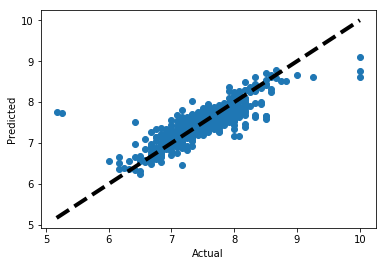

In [1431]:
# plotting the actual vs. predicted values of Cupper.Points based on the algorithm
models_actual_vs_predicted(xg_reg)

The results of the scatterplot are quite similar to those of LinearRegression, xgboost also has a hard time predicting the minimum and maximum values of Cupper.Points. Xgboost does though seem to be better at predicting the maximum of 10 than LinearRegresseion.

**Summarizing the results of each model**

For convenience we visualize the results of each model in relation to the three different scores MAE, RMSE and R2 on bar charts.

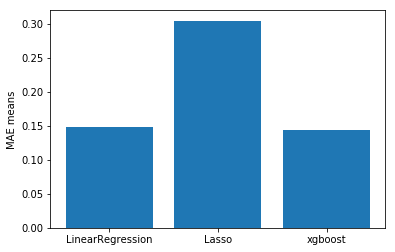

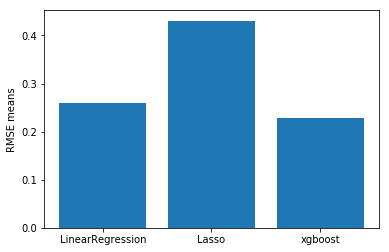

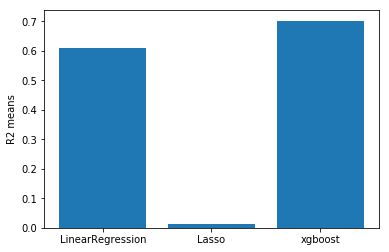

In [1432]:
# Saving the values and corresponding names in relation to MAE
MAE_means = [abs(reg_results[0]), abs(lasso_results[0]), abs(xgb_results[0])]
bars = ('LinearRegression', 'Lasso', 'xgboost',)
y_pos = np.arange(len(bars))
 
# Create bars and create names on the x-axis
plt.bar(y_pos, MAE_means)
plt.xticks(y_pos, bars)
plt.ylabel('MAE means')
# show the MAE plot
plt.show()

# Saving the values in relation to RMSE
RMSE_means = [reg_results[1], lasso_results[1], xgb_results[1]]
 
# Create bars and Create names on the x-axis
plt.bar(y_pos, RMSE_means)
plt.xticks(y_pos, bars)
plt.ylabel('RMSE means')
# show the RMSE plot
plt.show()

# Saving the values in relation to RMSE
R2_means = [abs(reg_results[2]), abs(lasso_results[2]), abs(xgb_results[2])]
 
# Create bars and Create names on the x-axis
plt.bar(y_pos, R2_means)
plt.xticks(y_pos, bars)
plt.ylabel('R2 means')
# show the RMSE plot
plt.show()

So, as it can be seen on the above bar charts, xgboost seems to be the best model in relation to predicting Cupper.Points, but the results are pretty similar in relation to LinearRegression when it comes to MAE and RMSE.

# Hyperparameter tuning

Since lasso performed the worst, it could be interesting to see if we can improve the result of this model by performing hyperparameter tuning. (doing this to LinearRegression is not possible, and xgboost is quite complicated)

In [1433]:
# We import GridSearchCV to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# We set the hyperparameter we want to improve, and the range in which 
# it should search for the optimal value
param_grid = {'alpha': np.arange(0,50)}

lasso_hype = Lasso()

# We then use GridSearchCV with our chosen model, parameters grids and number 
# of folds, this returns a GRidsearch obejct.
lasso_cv = GridSearchCV(lasso_hype, param_grid, cv=5) 

# fit the data to the GridSearchCV object, which performs the actual gridsearch
lasso_cv.fit(X_train, y_train)

# choosing the value of hyperameter that performed the best and storing it
alpha = lasso_cv.best_params_
print(alpha)

{'alpha': 0}


In [1434]:
# using the optimal value of alpha to create a new instantiation of lasso
lasso_hype_final = Lasso(alpha = alpha['alpha'])

# using our own function
lasso_hype_results = models_cross_valadation(lasso_hype_final)

# Model training
lasso_hype_final.fit(X_train, y_train)

# Model performance on the test-set
print('Score:',lasso_hype_final.score(X_test, y_test))
y_pred = lasso_hype_final.predict(X_test)

neg_mean_absolute_error [-0.16279025 -0.13437801 -0.13623749 -0.14144247 -0.17545313 -0.1567861
 -0.12357124 -0.13782083 -0.15987289 -0.16000734] 

neg_mean_absolute_error mean: -0.14883597490166242 

RMSE: [0.33612164 0.18755725 0.20521189 0.19349438 0.35783699 0.3119337
 0.17915473 0.18758661 0.31714448 0.32712209] 

RMSE mean: 0.2603163751545189 

r2 [0.4153955  0.8243908  0.64361698 0.81107463 0.35392944 0.56665939
 0.74632401 0.82665042 0.39848071 0.5110534 ] 

r2 mean: 0.6097575286479429 

Score: 0.5638499198873439


As it can be seen the results of the lasso regression improves quite drastically and actually become identical with those of LinearRegresion. Which perhaps can be explained by these two algorithms being similar

What caused these changes in the results? To better understand the changes, we visualize the coefficients as we did earlier, to show how these have changed based on the hyperparameter tuning. 

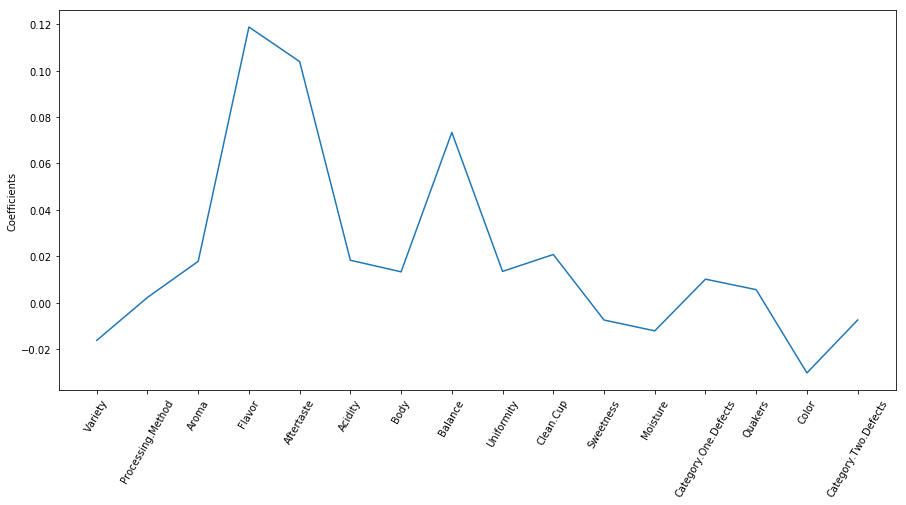

In [1435]:
# We plot the coefficients
lasso_coef = lasso_hype_final.coef_
plt.figure(figsize=(15,7)) # making the size of the figure bigger
_ = plt.plot(range(len(lasso_coef)), lasso_coef)
_ = plt.xticks(range(len(lasso_coef)), X, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

As can be seen on the figure, by setting alpha to the optimal value, each feature is "weighted" different, for instance flavor, aftertaste and balance is given more importance, whereas acidity and body is given less.

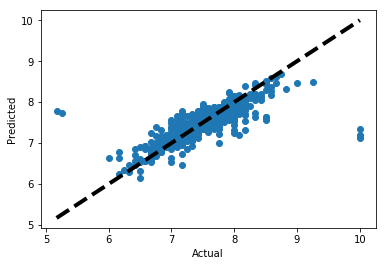

In [1436]:
# plotting the actual vs. predicted values of Cupper.Points based on the algorithm
models_actual_vs_predicted(lasso_hype_final)

As well as the scores of the tuned lasso model being identical to that of LinearRegression, the scatterplot also seems to be more or less identical.

To conclude it seems to be possible to predict the Cupper.Points based on the features of the dataset, with some margin of error, and furthermore xgboost seems to be the best model based on our results. 